Nama    : Aphrodity Nirmala Putri

NIM     : 23/511906/PA/21852

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sp
import control as ct
from control.matlab import tf2ss, ss2zpk
from scipy.linalg import eig

In [39]:
num = [1, -6, 8]
den = [1, 6, 25]

1. a.

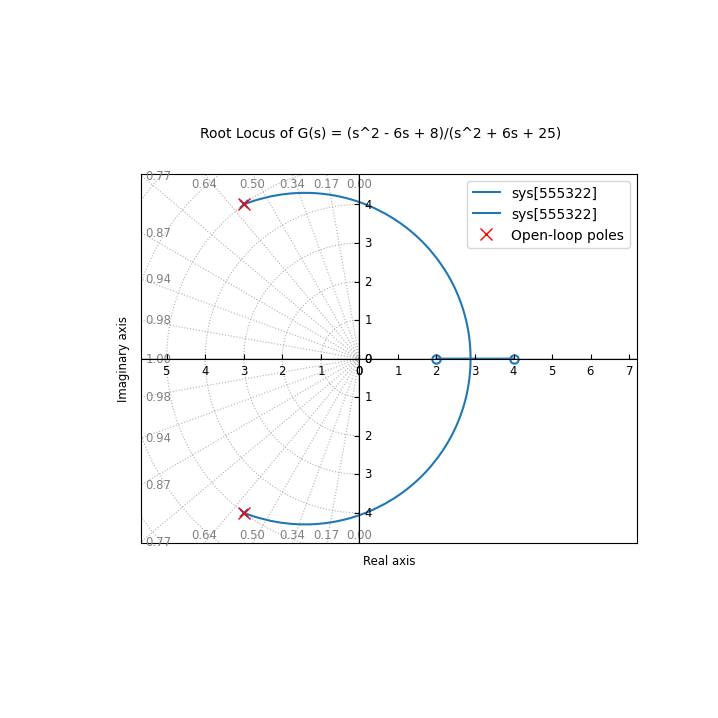

In [40]:
sys = ct.tf(num, den)

open_poles = ct.poles(sys)

cplt = ct.root_locus_plot(
    sys,
    grid = True,
    title = "Root Locus of G(s) = (s^2 - 6s + 8)/(s^2 + 6s + 25)",
)

ax = cplt.axes[0, 0]
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

ax.plot(
    np.real(open_poles),
    np.imag(open_poles),
    "rx", markersize=8,
    label="Open-loop poles",
)

ax.legend()
plt.show()

1. b.


K = 1
Closed-loop poles: [-0.+4.0620192j  0.-4.0620192j]
Natural frequencies ωn [rad/s]: [4.0620192 4.0620192]
Damping ratios ζ: [ 0. -0.]
Damped frequencies ωd [rad/s]: [ 4.0620192 -4.0620192]
Overshoot = 322.57379302838115%


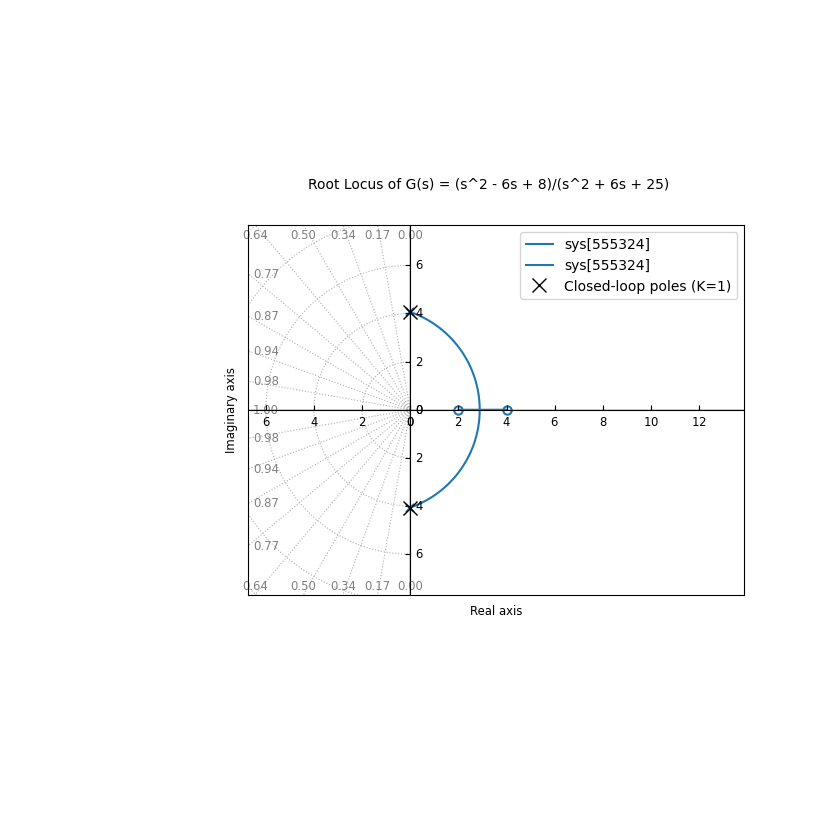


K = 3
Closed-loop poles: [1.5+3.16227766j 1.5-3.16227766j]
Natural frequencies ωn [rad/s]: [3.5 3.5]
Damping ratios ζ: [-0.42857143 -0.42857143]
Damped frequencies ωd [rad/s]: [ 3.16227766 -3.16227766]
Overshoot = 42277.189091500106%


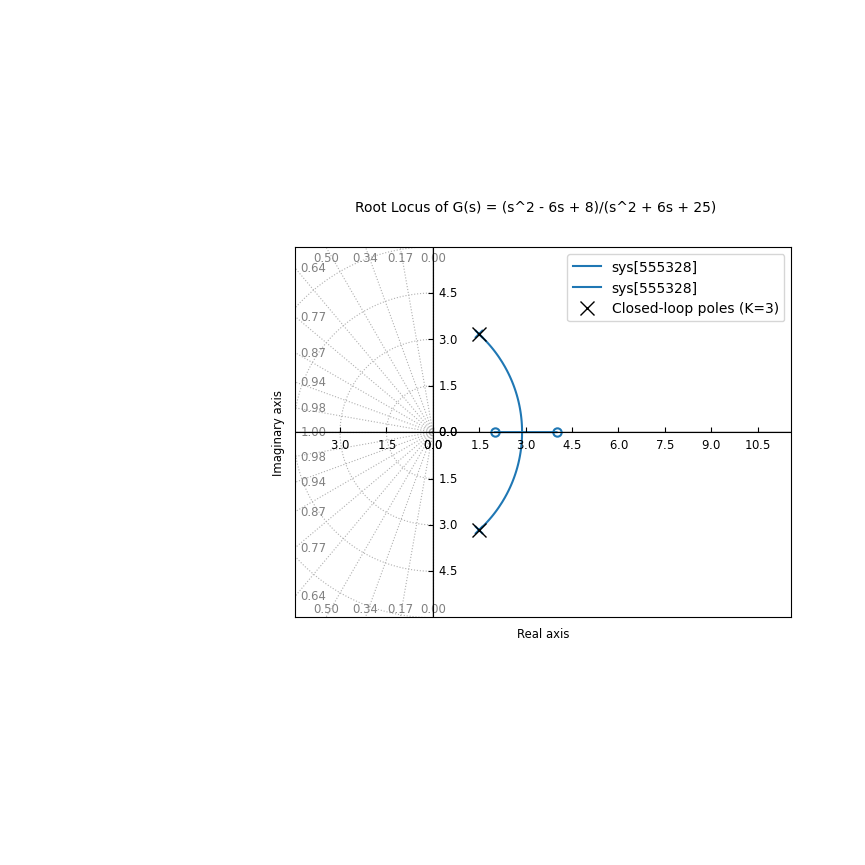


K = 5
Closed-loop poles: [2.+2.61406452j 2.-2.61406452j]
Natural frequencies ωn [rad/s]: [3.29140294 3.29140294]
Damping ratios ζ: [-0.60764362 -0.60764362]
Damped frequencies ωd [rad/s]: [ 2.61406452 -2.61406452]
Overshoot = 7982.597180088203%


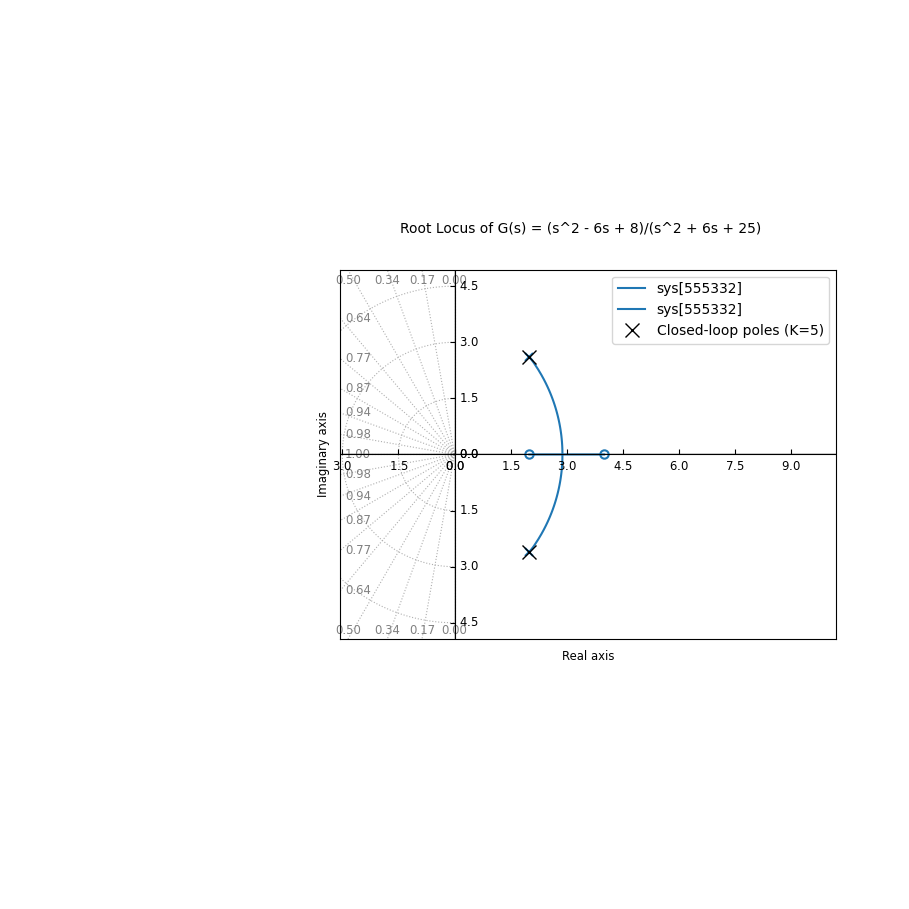


K = 7
Closed-loop poles: [2.25+2.25j 2.25-2.25j]
Natural frequencies ωn [rad/s]: [3.18198052 3.18198052]
Damping ratios ζ: [-0.70710678 -0.70710678]
Damped frequencies ωd [rad/s]: [ 2.25 -2.25]
Overshoot = 24907.919353950703%


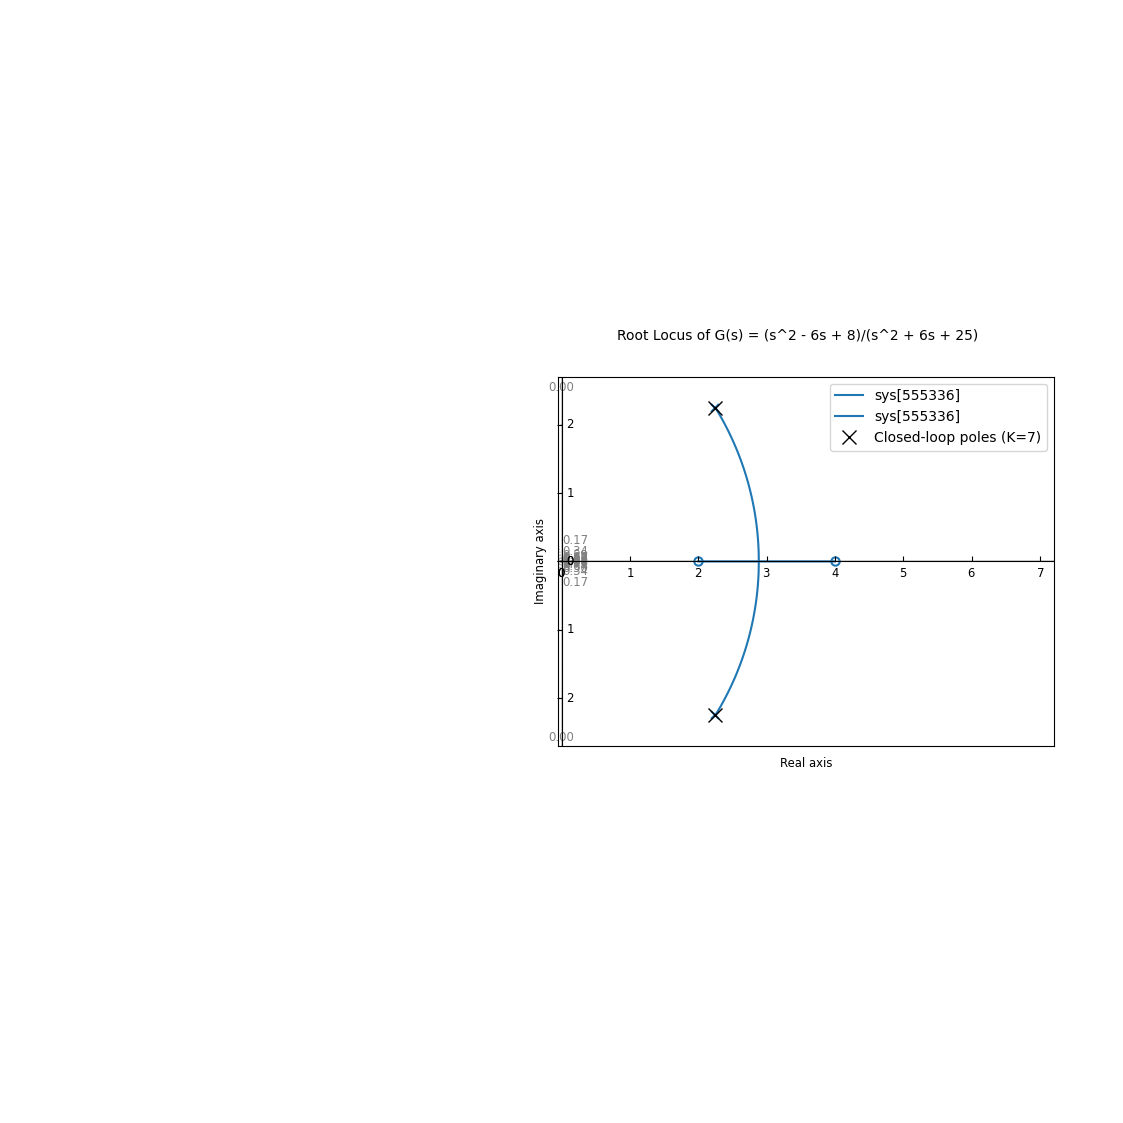

In [41]:
K = [1, 3, 5, 7]

for k in K:
    sys_cl = ct.feedback(sys, k)
    poles_cl = ct.poles(sys_cl)

    wn = np.abs(poles_cl)
    zeta = -np.real(poles_cl) / wn
    omega_d = np.imag(poles_cl)

    cplt_cl = ct.root_locus_plot(
    sys_cl,
    grid = True,
    title = "Root Locus of G(s) = (s^2 - 6s + 8)/(s^2 + 6s + 25)",
    )

    print(f"\nK = {k}")
    print("Closed-loop poles:", poles_cl)
    print("Natural frequencies ωn [rad/s]:", wn)
    print("Damping ratios ζ:", zeta)
    print("Damped frequencies ωd [rad/s]:", omega_d)
    info = ct.step_info(sys_cl)
    print(f"Overshoot = {info['Overshoot']}%")
    ax = cplt_cl.axes[0, 0]
    ax.set_xlabel('Real axis')
    ax.set_ylabel('Imaginary axis')
    ax.plot(
        np.real(poles_cl),
        np.imag(poles_cl),
        'kx', markersize=10,
        label=f'Closed‑loop poles (K={k})'
        )
    ax.legend()
    plt.show()
#print("Full step info:", info)

1. c. K = 1 Mulai stabil karena mendekati negatif

1. d.

=== Bagian (d): Target ζ = 0.5 ===
Penguatan K ≈ 0.100
Closed-loop poles: [-2.45454545+4.17489546j -2.45454545-4.17489546j]
Frekuensi alami ωn ≈ 4.843 rad/s
Fungsi alih kalang tertutup:
<TransferFunction>: sys[555342]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.1 s^2 - 0.6 s + 0.8
----------------------
1.1 s^2 + 5.4 s + 25.8



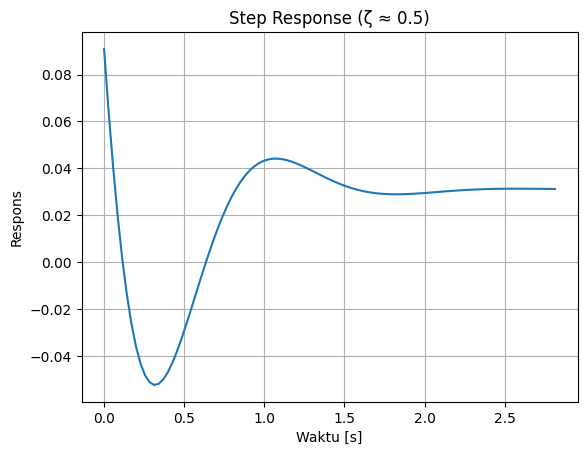

In [42]:
target_zeta = 0.5
tolerance_zeta = 0.01

best_k_zeta = None
best_poles_zeta = None
best_wn_zeta = None
best_sys_cl_zeta = None

for K in np.linspace(0.1, 50, 1000):
    sys_cl = ct.feedback(K * sys)
    poles = ct.poles(sys_cl)

    # Ambil kutub dominan kompleks
    dominant_pole = None
    for p in poles:
        if np.imag(p) != 0:
            dominant_pole = p
            break

    if dominant_pole is not None:
        wn = np.abs(dominant_pole)
        zeta = -np.real(dominant_pole) / wn

        if np.abs(zeta - target_zeta) <= tolerance_zeta:
            best_k_zeta = K
            best_poles_zeta = poles
            best_wn_zeta = wn
            best_sys_cl_zeta = sys_cl
            break

if best_k_zeta is not None:
    print("=== Bagian (d): Target ζ = 0.5 ===")
    print(f"Penguatan K ≈ {best_k_zeta:.3f}")
    print(f"Closed-loop poles: {best_poles_zeta}")
    print(f"Frekuensi alami ωn ≈ {best_wn_zeta:.3f} rad/s")
    print(f"Fungsi alih kalang tertutup:\n{best_sys_cl_zeta}")

    t, y = ct.step_response(best_sys_cl_zeta)
    plt.figure()
    plt.plot(t, y)
    plt.title("Step Response (ζ ≈ 0.5)")
    plt.xlabel("Waktu [s]")
    plt.ylabel("Respons")
    plt.grid(True)
    plt.show()
else:
    print("Tidak ditemukan nilai K yang memenuhi target ζ = 0.5 dalam batas toleransi.")

1. e.

In [43]:
target_wn = 2
tolerance_wn = 0.01

best_k_wn = None
best_poles_wn = None
best_wn_wn = None
best_sys_cl_wn = None

for K in np.linspace(0.1, 50, 100):
    sys_cl = ct.feedback(K * sys)
    poles = ct.poles(sys_cl)

    dominant_pole = None
    for p in poles:
        if np.imag(p) != 0:
            dominant_pole = p
            break

    if dominant_pole is not None:
        wn = np.abs(dominant_pole)

        if np.abs(wn - target_wn) <= tolerance_wn:
            zeta = -np.real(dominant_pole) / wn
            best_k_wn = K
            best_poles_wn = poles
            best_zeta_wn = zeta
            best_sys_cl_wn = sys_cl
            break

if best_k_wn is not None:
    print("=== Bagian (d): Target ζ = 0.5 ===")
    print(f"Penguatan K ≈ {best_k_wn:.3f}")
    print(f"Closed-loop poles: {best_poles_wn}")
    print(f"Frekuensi alami ωn ≈ {best_wn_wn:.3f} rad/s")
    print(f"Fungsi alih kalang tertutup:\n{best_sys_cl_wn}")

    t, y = ct.step_response(best_sys_cl_wn)
    plt.figure()
    plt.plot(t, y)
    plt.title("Step Response (ζ ≈ 0.5)")
    plt.xlabel("Waktu [s]")
    plt.ylabel("Respons")
    plt.grid(True)
    plt.show()
else:
    print("Tidak ditemukan nilai K yang memenuhi target wn = 2 dalam batas toleransi.")

Tidak ditemukan nilai K yang memenuhi target wn = 2 dalam batas toleransi.


In [44]:
K = [2000]

for k in K:
    sys_cl = ct.feedback(sys, k)
    poles_cl = ct.poles(sys_cl)

    wn = np.abs(poles_cl)
    zeta = -np.real(poles_cl) / wn
    omega_d = np.imag(poles_cl)


    print(f"\nK = {k}")
    print("Closed-loop poles:", poles_cl)
    print("Natural frequencies ωn [rad/s]:", wn)
    print("Damping ratios ζ:", zeta)
    print("Damped frequencies ωd [rad/s]:", omega_d)
    info = ct.step_info(sys_cl)
    print(f"Overshoot = {info['Overshoot']}%")

#print("Full step info:", info)


K = 2000
Closed-loop poles: [3.9836738+0.j 2.0103292+0.j]
Natural frequencies ωn [rad/s]: [3.9836738 2.0103292]
Damping ratios ζ: [-1. -1.]
Damped frequencies ωd [rad/s]: [0. 0.]
Overshoot = 0.10619690154923081%


2

In [45]:
A = np.array ([[0, 1, 0],
               [0, 0, 1],
               [-160, -56, -14]])
B = np.array ([[0],
               [1],
               [-14]])
C = np.array ([[1, 0, 0]])
D = np.array ([[0]])

2. a.

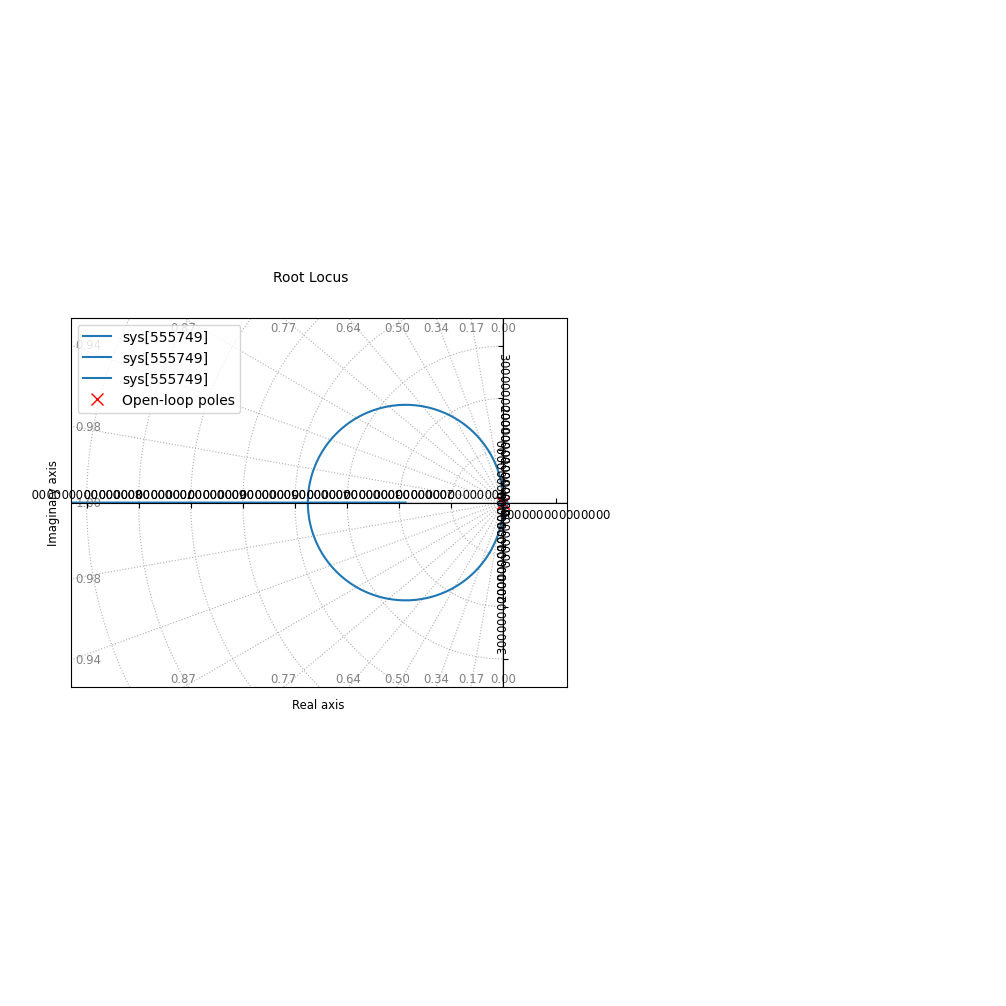

In [46]:
sys = ct.ss(A, B, C, D)

cplt = ct.root_locus_plot(
    sys,
    grid = True,
    title = "Root Locus",
)

ax = cplt.axes[0, 0]
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

ax.plot(
    np.real(open_poles),
    np.imag(open_poles),
    "rx", markersize=8,
    label="Open-loop poles",
)

ax.legend()
plt.show()

2. b.


K = 10
Closed-loop poles: [-2.79137637+3.3491503j -2.79137637-3.3491503j -8.41724725+0.j       ]
Natural frequencies ωn [rad/s]: [4.35988415 4.35988415 8.41724725]
Damping ratios ζ: [0.64024095 0.64024095 1.        ]
Damped frequencies ωd [rad/s]: [ 3.3491503 -3.3491503  0.       ]
Overshoot = 0%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1691: RuntimeWarning: divide by zero encountered in divide
  np.abs(yout/InfValue - 1) >= SettlingTimeThreshold)[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1691: RuntimeWarning: invalid value encountered in divide
  np.abs(yout/InfValue - 1) >= SettlingTimeThreshold)[0]


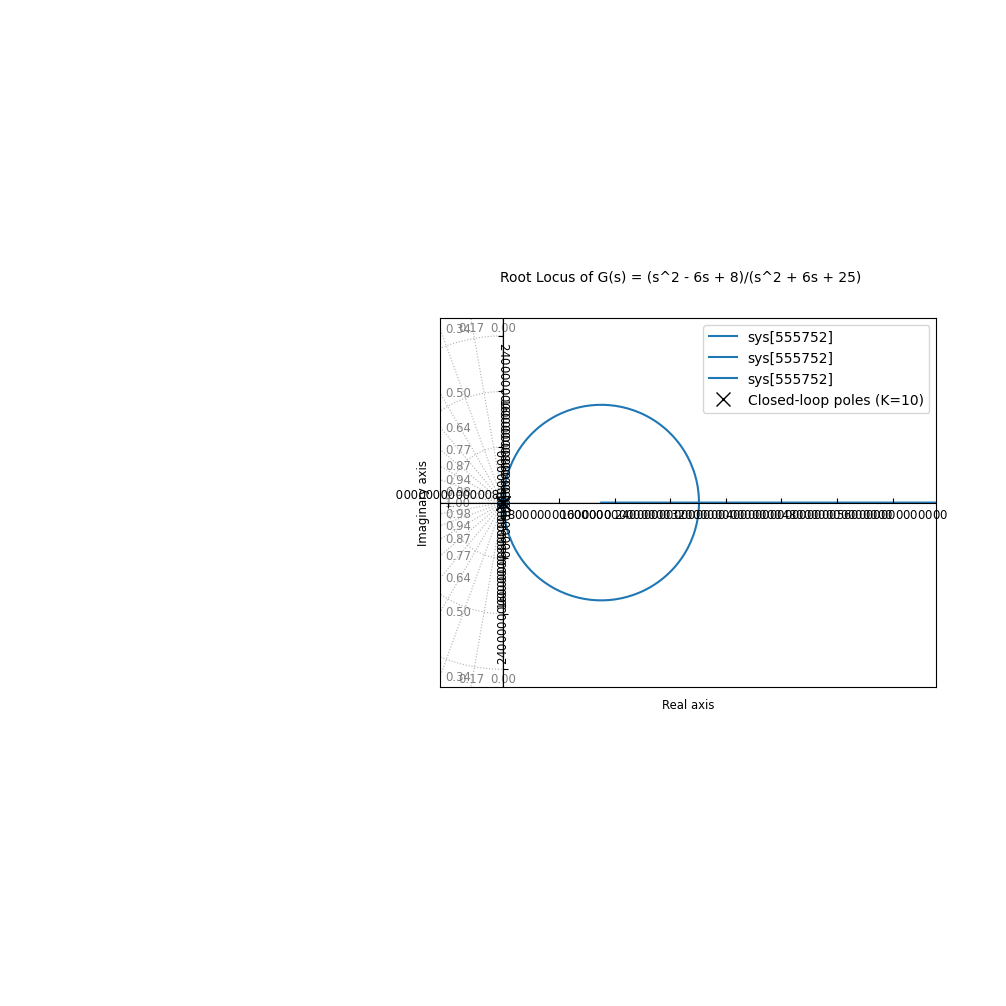


K = 30
Closed-loop poles: [-3.03468879+0.j         -5.48265561+4.76069118j -5.48265561-4.76069118j]
Natural frequencies ωn [rad/s]: [3.03468879 7.26110825 7.26110825]
Damping ratios ζ: [1.         0.75507146 0.75507146]
Damped frequencies ωd [rad/s]: [ 0.          4.76069118 -4.76069118]
Overshoot = 0%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1691: RuntimeWarning: divide by zero encountered in divide
  np.abs(yout/InfValue - 1) >= SettlingTimeThreshold)[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1691: RuntimeWarning: invalid value encountered in divide
  np.abs(yout/InfValue - 1) >= SettlingTimeThreshold)[0]


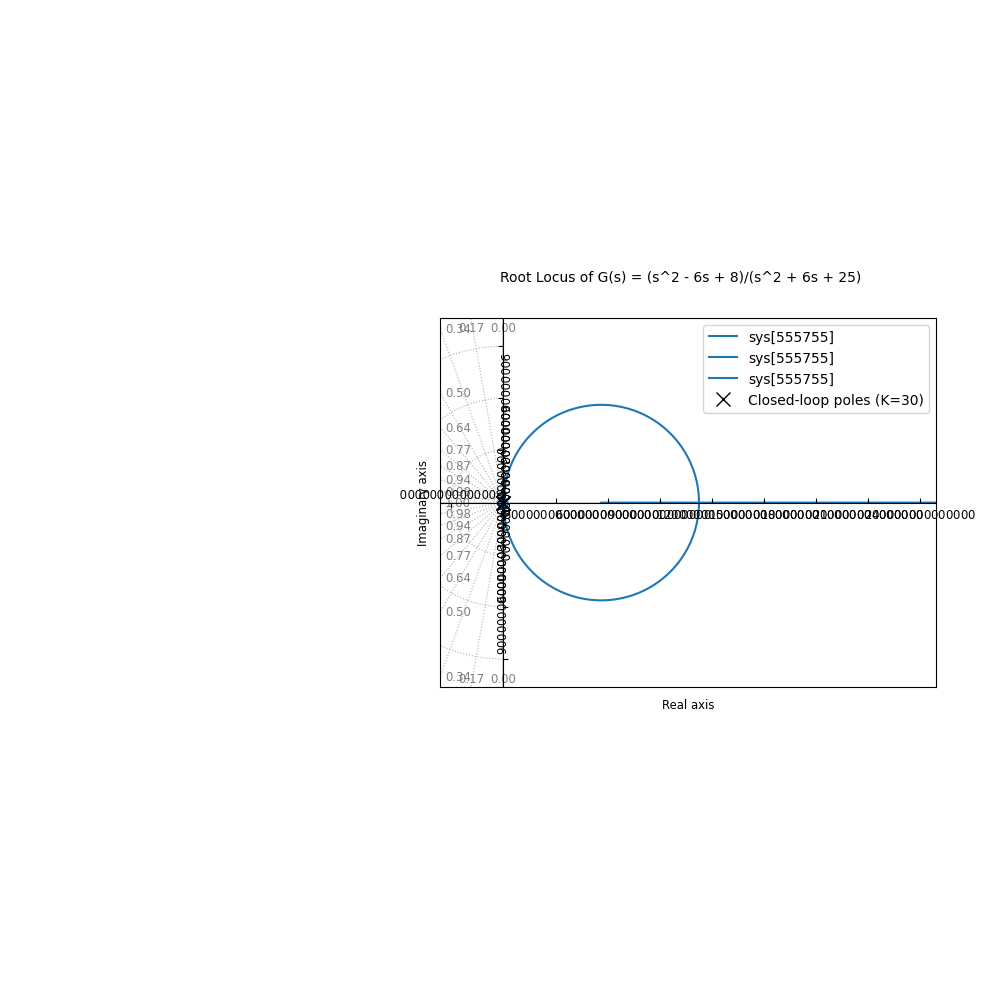


K = 50
Closed-loop poles: [-6.03199183+6.80139729j -6.03199183-6.80139729j -1.93601634+0.j        ]
Natural frequencies ωn [rad/s]: [9.09087072 9.09087072 1.93601634]
Damping ratios ζ: [0.6635219 0.6635219 1.       ]
Damped frequencies ωd [rad/s]: [ 6.80139729 -6.80139729  0.        ]
Overshoot = 0%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1691: RuntimeWarning: divide by zero encountered in divide
  np.abs(yout/InfValue - 1) >= SettlingTimeThreshold)[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1691: RuntimeWarning: invalid value encountered in divide
  np.abs(yout/InfValue - 1) >= SettlingTimeThreshold)[0]


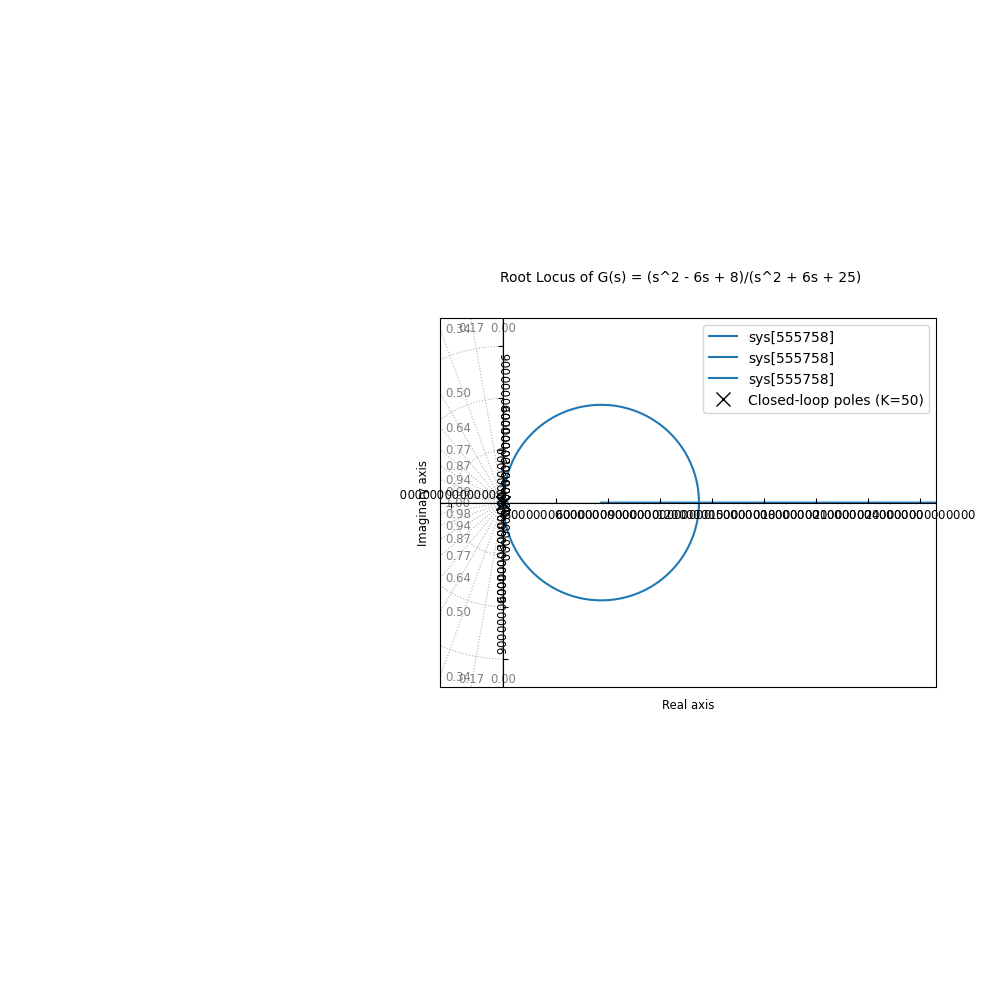


K = 70
Closed-loop poles: [-6.25481608+8.26034638j -6.25481608-8.26034638j -1.49036785+0.j        ]
Natural frequencies ωn [rad/s]: [10.36127629 10.36127629  1.49036785]
Damping ratios ζ: [0.60367236 0.60367236 1.        ]
Damped frequencies ωd [rad/s]: [ 8.26034638 -8.26034638  0.        ]
Overshoot = 0%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1691: RuntimeWarning: divide by zero encountered in divide
  np.abs(yout/InfValue - 1) >= SettlingTimeThreshold)[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1691: RuntimeWarning: invalid value encountered in divide
  np.abs(yout/InfValue - 1) >= SettlingTimeThreshold)[0]


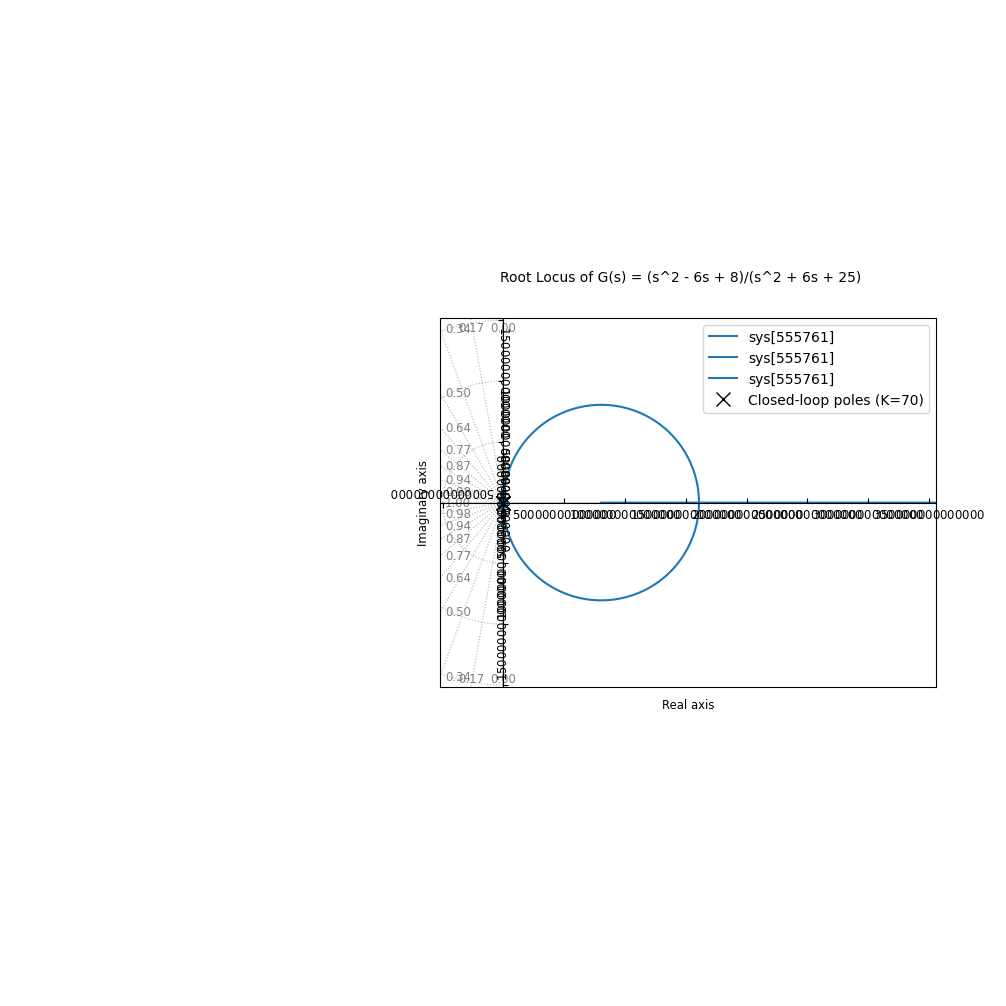

In [47]:
K = [10, 30, 50, 70]

for k in K:
    sys_cl = ct.feedback(sys, k)
    poles_cl = ct.poles(sys_cl)

    wn = np.abs(poles_cl)
    zeta = -np.real(poles_cl) / wn
    omega_d = np.imag(poles_cl)

    cplt_cl = ct.root_locus_plot(
    sys_cl,
    grid = True,
    title = "Root Locus of G(s) = (s^2 - 6s + 8)/(s^2 + 6s + 25)",
    )

    print(f"\nK = {k}")
    print("Closed-loop poles:", poles_cl)
    print("Natural frequencies ωn [rad/s]:", wn)
    print("Damping ratios ζ:", zeta)
    print("Damped frequencies ωd [rad/s]:", omega_d)
    info = ct.step_info(sys_cl)
    print(f"Overshoot = {info['Overshoot']}%")
    ax = cplt_cl.axes[0, 0]
    ax.set_xlabel('Real axis')
    ax.set_ylabel('Imaginary axis')
    ax.plot(
        np.real(poles_cl),
        np.imag(poles_cl),
        'kx', markersize=10,
        label=f'Closed‑loop poles (K={k})'
        )
    ax.legend()
    plt.show()
#print("Full step info:", info)

2. c. 

2. d.

=== Bagian (d): Target ζ = 0.5 ===
Penguatan K ≈ 0.100
Closed-loop poles: [-2.00658854+3.4633385j -2.00658854-3.4633385j -9.98682292+0.j       ]
Frekuensi alami ωn ≈ 4.003 rad/s
Fungsi alih kalang tertutup:
<StateSpace>: sys[555765]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.000e+00  1.000e+00  0.000e+00]
     [-1.000e-01  0.000e+00  1.000e+00]
     [-1.586e+02 -5.600e+01 -1.400e+01]]

B = [[ 0. ]
     [ 0.1]
     [-1.4]]

C = [[1. 0. 0.]]

D = [[0.]]



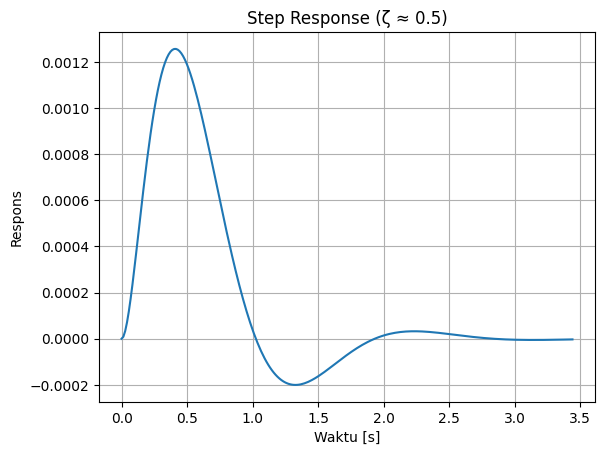

In [48]:
target_zeta = 0.5
tolerance_zeta = 0.01

best_k_zeta = None
best_poles_zeta = None
best_wn_zeta = None
best_sys_cl_zeta = None

for K in np.linspace(0.1, 50, 1000):
    sys_cl = ct.feedback(K * sys)
    poles = ct.poles(sys_cl)

    # Ambil kutub dominan kompleks
    dominant_pole = None
    for p in poles:
        if np.imag(p) != 0:
            dominant_pole = p
            break

    if dominant_pole is not None:
        wn = np.abs(dominant_pole)
        zeta = -np.real(dominant_pole) / wn

        if np.abs(zeta - target_zeta) <= tolerance_zeta:
            best_k_zeta = K
            best_poles_zeta = poles
            best_wn_zeta = wn
            best_sys_cl_zeta = sys_cl
            break

if best_k_zeta is not None:
    print("=== Bagian (d): Target ζ = 0.5 ===")
    print(f"Penguatan K ≈ {best_k_zeta:.3f}")
    print(f"Closed-loop poles: {best_poles_zeta}")
    print(f"Frekuensi alami ωn ≈ {best_wn_zeta:.3f} rad/s")
    print(f"Fungsi alih kalang tertutup:\n{best_sys_cl_zeta}")

    t, y = ct.step_response(best_sys_cl_zeta)
    plt.figure()
    plt.plot(t, y)
    plt.title("Step Response (ζ ≈ 0.5)")
    plt.xlabel("Waktu [s]")
    plt.ylabel("Respons")
    plt.grid(True)
    plt.show()
else:
    print("Tidak ditemukan nilai K yang memenuhi target ζ = 0.5 dalam batas toleransi.")

2. d.

In [50]:
target_wn = 10
tolerance_wn = 0.01

best_k_wn = None
best_poles_wn = None
best_wn_wn = None
best_sys_cl_wn = None

for K in np.linspace(0.1, 50, 100):
    sys_cl = ct.feedback(K * sys)
    poles = ct.poles(sys_cl)

    dominant_pole = None
    for p in poles:
        if np.imag(p) != 0:
            dominant_pole = p
            break

    if dominant_pole is not None:
        wn = np.abs(dominant_pole)

        if np.abs(wn - target_wn) <= tolerance_wn:
            zeta = -np.real(dominant_pole) / wn
            best_k_wn = K
            best_poles_wn = poles
            best_zeta_wn = zeta
            best_sys_cl_wn = sys_cl
            break

if best_k_wn is not None:
    print("=== Bagian (d): Target ζ = 0.5 ===")
    print(f"Penguatan K ≈ {best_k_wn:.3f}")
    print(f"Closed-loop poles: {best_poles_wn}")
    print(f"Frekuensi alami ωn ≈ {best_wn_wn:.3f} rad/s")
    print(f"Fungsi alih kalang tertutup:\n{best_sys_cl_wn}")

    t, y = ct.step_response(best_sys_cl_wn)
    plt.figure()
    plt.plot(t, y)
    plt.title("Step Response (ζ ≈ 0.5)")
    plt.xlabel("Waktu [s]")
    plt.ylabel("Respons")
    plt.grid(True)
    plt.show()
else:
    print("Tidak ditemukan nilai K yang memenuhi target wn = 2 dalam batas toleransi.")

Tidak ditemukan nilai K yang memenuhi target wn = 2 dalam batas toleransi.
